In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Data1 = pd.DataFrame([[0,225,204,943,1141,997,1051,766,1296],[225,0,430,653,665,674,913,552,972],[608,123,0,583,669,789,843,482,977],
                      [943,653,1107,0,1005,861,382,101,774],[280,665,1339,1039,0,819,1147,939,1118],[997,674,1161,861,143,0,450,762,358],
                      [1022,854,1186,382,902,940,0,302,602],  [690,552,854,101,905,762,302,0,1060], [1355,972,1519,1219,501,358,808,1119,0]
                      ], columns=["A","B","C","D","E","F","G","H","I"],
                     index=["A","B","C","D","E","F","G","H","I"]) # Dataframe for 9-cities


X0 = ["A","C","H","G","D","I","E","B","F"] # Initial solution

Distances = [] # The OF of the initial solution
t = 0
for i in range(len(X0)-1):
    X1 = Data1.loc[X0[t],X0[t+1]] # Each city and the city after it
    X11 = Data1.loc[X0[-1],X0[0]] # The last city to the first city
    Distances.append(X1) # Append the distances
    t = t+1

Distances.append(X11) # Append the distance of the last city with the first one
Length_of_Travel = sum(Distances) # Add up the distances

print("Length_of_Travel:",Length_of_Travel)



Length_of_Travel: 4981


C:\Users\44792\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


Final Solution is:  ['A', 'C', 'B', 'H', 'D', 'G', 'I', 'F', 'E']
Minimized Distance at Final Solution is:  2745


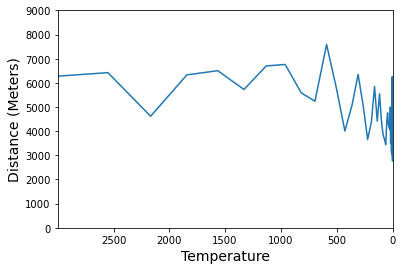

In [11]:

### PARAMETERS ###

T0 = 3000
M = 1000
N = 20
Alpha = 0.85

# For visualization
Temp = []
Min_Distance = []


for i in range(M):
    for j in range(N):
        # To generate random integers in order to swap cities
        Ran1 = np.random.randint(0,len(X0))
        Ran2 = np.random.randint(0,len(X0))
        while Ran1 == Ran2:
            Ran2 = np.random.randint(0,len(X0))
        
        Xtemp = []
        A1 = X0[Ran1] # Select the city to swap
        A2 = X0[Ran2] # Select the city to swap
        
        # ["A","C","G","D","E","B","F"]
        
        # Making a new list of the new set of cities
        w = 0
        for i in X0:
            if X0[w]==A1:
                Xtemp=np.append(Xtemp,A2)
            elif X0[w]==A2:
                Xtemp=np.append(Xtemp,A1)
            else:
                Xtemp=np.append(Xtemp,X0[w])
            w = w+1
        
        Xtemp = list(Xtemp)
        
        
        
        Distances_X0 = [] # The OF of the solution in hand
        t = 0
        for i in range(len(X0)-1):
            X1_1 = Data1.loc[X0[t],X0[t+1]] # Each city and the city after it
            X11 = Data1.loc[X0[-1],X0[0]] # The last city to the first city
            Distances_X0.append(X1_1) # Append the distances
            t = t+1
        
        Distances_X0.append(X11) # Append the distance of the last city with the first one
        Len_X0 = sum(Distances_X0) # Add up the distances
        
        
        Distances_Xtemp = [] # The OF of the potential solution (n+1)
        t = 0
        for i in range(len(Xtemp)-1):
            X1_2 = Data1.loc[Xtemp[t],Xtemp[t+1]] # Each city and the city after it
            X11 = Data1.loc[Xtemp[-1],Xtemp[0]] # The last city to the first city
            Distances_Xtemp.append(X1_2) # Append the distances
            t = t+1
        
        Distances_Xtemp.append(X11) # Append the distance of the last city with the first one
        Len_Xtemp = sum(Distances_Xtemp) # Add up the distances
        
        
        rand_num = np.random.rand() # RN for the formula below
        form_1 = 1/(np.exp((Len_Xtemp-Len_X0)/T0)) # The formula to accept moves
        
        if Len_Xtemp <= Len_X0: # If the OF of the potential solution was better (less)
            X0 = Xtemp
        
        elif rand_num <= form_1: # If the RN was less than the formula
            X0 = Xtemp
        
        else: # Don't accept the potential solution and stay where you are
            X0 = X0
            
    Temp = np.append(Temp, T0) # Append temps. for visualization
    Min_Distance = np.append(Min_Distance,Len_Xtemp) # Append costs for visualization
    
    T0 = Alpha*T0 # Decrease the temp.    

print
print
print("Final Solution is: ", X0)
print("Minimized Distance at Final Solution is: ", Len_X0)


plt.plot(Temp,Min_Distance)
plt.xlabel("Temperature",fontsize=14)
plt.ylabel("Distance (Meters)",fontsize=14)
plt.xlim(3000, 0)
plt.xticks(np.arange(min(Temp), max(Temp), 500))
plt.yticks()
plt.ylim(0, 9000)
plt.show()

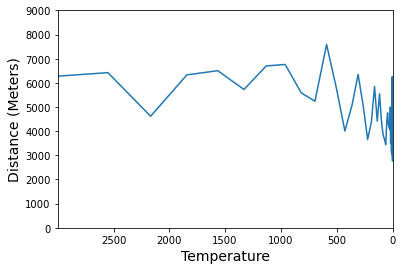

In [12]:
plt.plot(Temp,Min_Distance)
plt.xlabel("Temperature",fontsize=14)
plt.ylabel("Distance (Meters)",fontsize=14)
plt.xlim(3000, 0)
plt.xticks(np.arange(min(Temp), max(Temp), 500))
plt.yticks()
plt.ylim(0, 9000)
plt.show()